# Bagging & randomforest in Classsifier

In [28]:
import pandas as pd
from sklearn.datasets import make_moons
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
x,y=make_moons(n_samples=200,noise=0.2)
y

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

In [12]:
dict={
    'x1':x[:,0],
    'x2':x[:,1],
    'y':y[:,]
}

In [13]:
df=pd.DataFrame(dict)
df.head()

,x1,x2,y
0,1.097647,-0.618422,1
1,0.967706,1.139071,0
2,0.122584,-0.379530,1
3,1.108826,-0.657157,1
4,1.082244,-0.291396,1


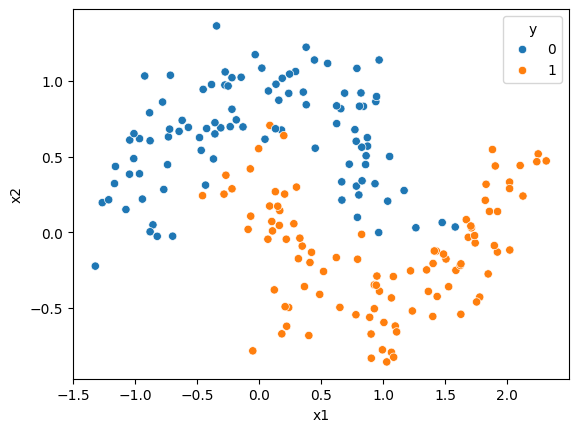

In [14]:
sns.scatterplot(x='x1',y='x2',data=df,hue='y')
plt.show()

In [16]:
new_x=df.iloc[:,:-1]
new_y=df['y']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(new_x,new_y,test_size=0.2,random_state=42)

In [18]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [19]:
svm.score(x_train,y_train)*100,svm.score(x_test,y_test)*100

(96.25, 92.5)

In [23]:
bc=BaggingClassifier(estimator=SVC(),n_estimators=50)
bc.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=50)

In [24]:
bc.score(x_train,y_train)*100,bc.score(x_test,y_test)*100,

(96.875, 92.5)

In [45]:
rf=RandomForestClassifier(n_estimators=45)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=45)

In [46]:
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100

(100.0, 87.5)

In [29]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(100.0, 92.5)

# Bagging & Random Forest in Regressor

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [48]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


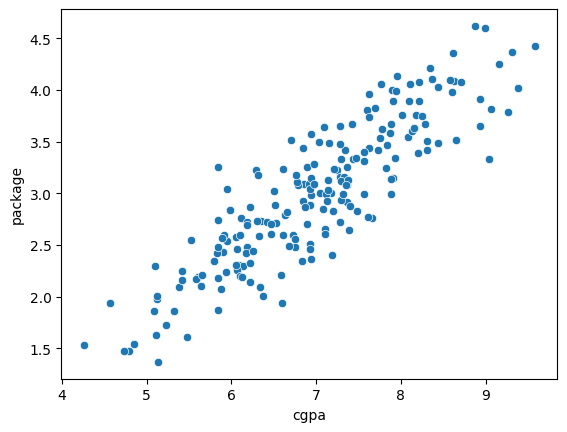

In [49]:
sns.scatterplot(x='cgpa',y='package',data=df)
plt.show()

In [50]:
x=df[['cgpa']]
y=df['package']

In [51]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
svm=SVR()
svm.fit(x_train,y_train)

SVR()

In [54]:
svm.score(x_train,y_train)*100,svm.score(x_test,y_test)*100

(86.61979667490449, 80.49704681155822)

In [63]:
br=BaggingRegressor(estimator=SVR(),n_estimators=30)
br.fit(x_train1,y_train1)

BaggingRegressor(estimator=SVR(), n_estimators=30)

In [64]:
br.score(x_train1,y_train1)*100,br.score(x_test1,y_test1)*100

(78.24050446615112, 76.84514324435756)

In [68]:
rf=RandomForestRegressor(n_estimators=50,max_depth=4)
rf.fit(x_train1,y_train1)

RandomForestRegressor(max_depth=4, n_estimators=50)

In [69]:
rf.score(x_train1,y_train1)*100,rf.score(x_test1,y_test1)*100

(83.18266052233622, 75.6554489827053)